In [1]:
import pandas as pd
import os
import numpy as np
import plotly
import plotly.graph_objects as go

In [2]:
# create the table
data = pd.DataFrame(np.array([['A', 'AP', 'APP', 'APPL', 6], \
                              ['A', 'AP', 'APE', 'APEX', 3], \
                              ['A', 'AG', 'AGG', 'AGGR', 8], \
                              ['B', 'BE', 'BEA', 'BEAT', 13], \
                              ['B', 'BE', 'BEA', 'BEAR', 3], \
                              ['B', 'BE', 'BER', 'BERT', 3], \
                              ['C', 'CH', 'CHA', 'CHAN', 1], \
                              ['C', 'CH', 'CHA', 'CHAD', 2], \
                              ['C', 'CA', 'CAR', 'CARP', 7], \
                              ['C', 'CA', 'CAR', 'CART', 3], \
                              ['C', 'CA', 'CAR', 'CARS', 5], \
                              ['J', 'JO', 'JOK', 'JOKE', 3], \
                              ['J', 'JO', 'JOS', 'JOSE', 4], \
                              ['J', 'JO', 'JOS', 'JOSH', 1], \
                             ]),
                   columns=['lvl1', 'lvl2', 'lvl3', 'lvl4', 'count'])

# show the table
data

,lvl1,lvl2,lvl3,lvl4,count
0,A,AP,APP,APPL,6
1,A,AP,APE,APEX,3
2,A,AG,AGG,AGGR,8
3,B,BE,BEA,BEAT,13
4,B,BE,BEA,BEAR,3
5,B,BE,BER,BERT,3
6,C,CH,CHA,CHAN,1
7,C,CH,CHA,CHAD,2
8,C,CA,CAR,CARP,7
9,C,CA,CAR,CART,3


In [3]:
# generates a
def genSankey(df,cat_cols=[],value_cols='',title='Sankey Diagram'):
    # maximum of 6 value cols -> 6 colors
    colorPalette = ['#ff0000','#306998','#FFE873','#FFD43B','#646464']
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
        
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
    
    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum
        
    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
    
    fig = go.Figure(data=[go.Sankey(
    #valueformat = ".0f",
    #valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  labelList,
      color =  colorList
    ),
    # Add links
    link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['count'],
          label = labelList,
          #color = colorList
    ))])
    
#     # creating the sankey diagram
#     data = dict(
#         type='sankey',
#         node = dict(
#           pad = 15,
#           thickness = 20,
#           line = dict(
#             color = "black",
#             width = 0.5
#           ),
#           label = labelList,
#           color = colorList
#         ),
#         link = dict(
#           source = sourceTargetDf['sourceID'],
#           target = sourceTargetDf['targetID'],
#           value = sourceTargetDf['count']
#         )
#       )
    
#     layout =  dict(
#         title = title,
#         font = dict(
#           size = 10
#         )
#     )
       
#     fig = dict(data=[data], layout=layout)
    fig.update_layout(title_text=title, font_size=10)
    return fig

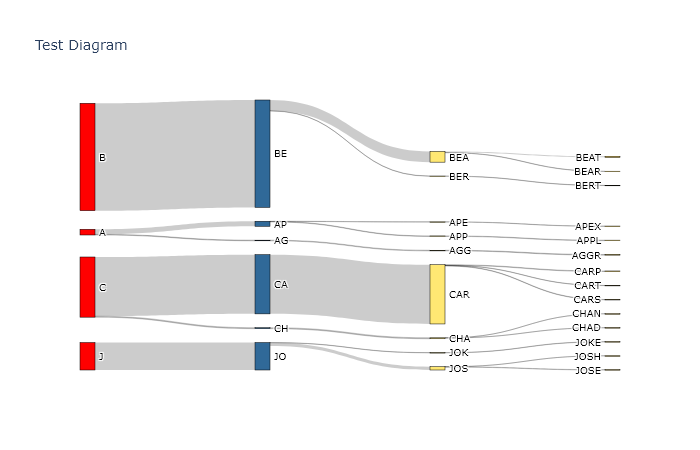

In [4]:
# generate plot
fig = genSankey(data,cat_cols=['lvl1','lvl2','lvl3','lvl4'],value_cols='count',title='Test Diagram')
fig.show(renderer="png")